**Równania Różniczkowe w Technice** - W13, PWr

Projekt - semestr zimowy 2021/22

**Temat:** *Charakterystyka przepływu prądu w układach RLC*.

**Autorzy:**

* Adam Kawałko, 262329
* Mateusz Machaj, 262288

# Opis

W naszej pracy przedstawimy działanie obwodu RLC, rozwiążemy równanie różniczkowe na kilka sposobów.
Będziemy korzystać z praw Kirchhoffa, prawa Ohma oraz prawa Faradaya. Postaramy się także zaprezentować eksperyment.
Uzyskane wyniki przedstawimy na wykresach oraz w podsumowaniu.

In [5]:
%load_ext nb_black

ModuleNotFoundError: No module named 'nb_black'

Import bibliotek *Python*:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

Format wyświetlanych grafik:

In [7]:
HTML(
    """
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""
)

# Obwód RLC

Co to jest **RLC**? 
**RLC** to skrót dla obwodów elektrycznych, w których skład wchodzą tylko trzy elementy pasywne: 
- rezystor (**R**),
- cewka (**L**),
- kondensator (**C**).

Elementy **RLC** mogą być połączone na różne sposoby, mogą też występować obwody bez cewki **L** lub bez kondensatora **C**. Nas jednak będą interesowały najciekawsze układy - z wszystkimi trzema rodzajami elementów.

Pochylimy się głównie nad ich podłączeniem szeregowym w jednym oczku, ale warto zwrócić uwagę, że konfiguracji może być wiele - na przykład równoległe podłączenia oraz układy złożone z wielu oczek. Do badania charakterystyki użyjemy też innych elementów, takich jak przełącznik czy bezpiecznik.

![Rysunek 1. Szeregowy układ RLC](images/rlc_1.png) <center> Rysunek 1. Szeregowy układ RLC

<font color='red'>**??????????????????**</font> 

# Prawo Ohma

Z **prawa Ohma** wiemy, że natężenie $I$ jest wprost proporcjonalne do napięcia $U$:

$$U = IR.$$

Możemy również przejść do równania różniczkowego. Będziemy mieli do czynienia z przewodnikiem o długości $dl$ oraz powierzchni przekroju $dS$

$$dI = \frac{1}{R}dU$$

Teraz możemy wyrazić natężenie prądu używając jego gęstości $\vec{j}$

$$dI = \vec{j}d\vec{S}$$

Natomiast napięcie wyrazimy przy pomocy natężenie pola elektrycznego $\vec{E}$

$$dU = \vec{E}d\vec{l}$$

Stąd:

$$\vec{j}d\vec{S} = \frac{1}{R}\vec{E}d\vec{l}$$

Jeśli wybierzemy przekrój $dS$ prostopadle do kierunku płynącego prądu i podstawimy jako $\frac{1}{R}$

$$\frac{1}{R} = σ\frac{dS}{dl}$$

dostaniemy

$$\vec{j}=σ\vec{E}$$

Widzimy tutaj, że gęstość prądu jest powiązana z natężeniem pola elektrycznego w przewodniku.

<font color='red'>**??????????????????**</font> 

# Równanie główne 
[[1]](#bib1)

Rozpatrzmy układ szeregowy z jednym oczkiem, źródłem prądu i trzema elementami pasywnymi: opornikiem, cewką oraz kondensatorem. 

Korzystając z **drugiego prawa Kirchhoffa**, dzięki któremu wiemy, że całkowity spadek napięcia w obwodzie zamkniętym równy jest przyłożonej sile elektromotorycznej, możemy napisać:

$$U_R + U_L + U_C = {\mathcal {E}}(t).$$

Spadek napięcia $U_R$ na oporniku to według **prawa Ohma** iloczyn natężenia prądu $I$ oraz oporu $R$, stąd 


$$U_R = RI.$$

Według **prawa Faradaya** spadek napięcia na cewce to iloczyn jej indukcyjności $L$ i prędkości zmian prądu w czasie $\frac{dI}{dt}$, dlatego mamy 

$$U_L = L\frac{dI}{dt}.$$

Natomiast spadek napięcia na kondensatorze to iloraz ładunku kondensatora $q$ i jego pojemności $C$, stąd mamy

$$U_C=\frac{Q}{C}.$$

Nasze równanie $U_R + U_L + U_C = {\mathcal {E}}(t)$ możemy zapisać zatem jako

$$L\frac{dI}{dt} + RI + \frac{Q}{C} = {\mathcal {E}}.$$

Wiemy, że zależność natężenia to ładunku kondensatora zapisujemy $I=\frac{dQ}{dt}$, stąd różniczkując obustronnie względem $t$ dostaniemy

$$L\frac{d^2}{dt^2}I(t)+R\frac{d}{dt}I(t)+\frac{1}{C}I(t)=\frac{d}{dt}{\mathcal {E}}(t).$$

# Rozwiązanie analityczne równania

Rozważymy przypadek, gdzie siła elektromotoryczna będzie prostą funkcją okresową, np. ${\mathcal {E}}(t)=U_0 \cos(\omega t)$. Oznacza to, że mamy do czynienia z klasycznym przypadkiem prądu przemiennego. Zaniedbujemy na razie kwestię przesunięcia w fazie napięcia źródła, gdyż to nie jest tak istotne dla całości rozważania. Równanie ma wtedy postać

$$L\frac{d^2}{dt^2}I(t)+R\frac{d}{dt}I(t)+\frac{1}{C}I(t)=-U_0\omega \sin(\omega t),$$

gdyż ${\mathcal {E}}'(t) = (U_0 \cos(\omega t))'=-U_0\omega \sin(\omega t).$

### Rozwiązania zanikające  
[[2]](#bib2)

Na początku znajdujemy rozwiązania układu jednorodnego
$$L\frac{d^2I}{dt^2}+R\frac{dI}{dt}+\frac{I}{C}=0.$$

Nasz wielomian charakterystyczny będzie postaci
$$L\lambda^2+R\lambda+\frac{1}{C}=0.$$

$$\Delta = R^2 - \frac{4L}{C};$$
$$\lambda_{1,2} = \frac{-R\pm \sqrt{R^2 - \frac{4L}{C}}}{2L}.$$

Możemy użyć uproszczonych zmiennych $\alpha = \frac{R}{2L}$ oraz $\omega_0 = \frac{1}{\sqrt{LC}}$. Wtedy 

$$\lambda_{1,2} = -\alpha \pm \sqrt{\alpha^2-\omega_0^2}.$$


*  Gdy $\Delta < 0 \iff \omega_0 > \alpha$ (tłumienie słabe) rozwiązanie ogólne równania to

$$I(t) = e^{-\alpha t}(C_1 \cos(\sqrt{\omega_0^2-\alpha^2}\,t)+C_2 \sin(\sqrt{\omega_0^2-\alpha^2}\, t)).$$

* Gdy $\Delta = 0 \iff \omega_0 = \alpha$ rozwiązanie ogólne ma postać

$$I(t) = C_1 e^{-\alpha t} + C_2 t e^{-\alpha t}.$$


* Gdy $\Delta > 0 \iff \omega_0 < \alpha$ (tłumienie silne) otrzymujemy rozwiązanie

$$I(t) = C_1 e^{-\alpha + \sqrt{\alpha^2-\omega_0^2} t} + C_2 e^{-\alpha - \sqrt{\alpha^2-\omega_0^2} t}.$$


### Rozwiązania "stanu stabilnego"

Następnie szukamy funkcji $\varphi(t)$ - liniowo niezależnego rozwiązania układu niejednorodnego. Stosujemy metodę przewidywania.

Niech 

$$\varphi(t) = D_1 \cos(\omega t) + D_2 \sin(\omega t),$$

$$\varphi ' (t)=\omega(-D_1 \sin(\omega t) + D_2\cos(\omega t)),$$

$$\varphi '' (t) = \omega^2 (-D_1 \cos(\omega t)-D_2\sin(\omega t)).$$

Po podstawieniu do bazowego równania otrzymujemy

$$(-D_1 L \omega^2 + D_2 R \omega + \frac{D_1}{C})\cos(\omega t ) + (-D_2 L \omega^2 - D_1 R \omega + \frac{D_2}{C})\sin(\omega t) = - U_0\omega \sin(\omega t),$$

dlatego

$$
\left\{
    \begin{array}\\
        -D_1 L \omega^2 + D_2 R \omega + \frac{D_1}{C} = 0\\
        -D_2 L \omega^2 - D_1 R \omega + \frac{D_2}{C} = -U_0 \omega
    \end{array}.
\right.
$$
Ostatecznie 
$$
\left\{
    \begin{array}\\
        D_1 = U_0\omega\frac{R\omega}{R^2\omega^2+(L\omega^2-\frac{1}{C})^2}\\
        D_2 = U_0\omega\frac{L\omega^2-\frac{1}{C}}{R^2\omega^2+(L\omega^2-\frac{1}{C})^2}
    \end{array}.
\right.
$$

Równie dobrze [[3]](#bib3) można jednak zastosować zapis

$$\varphi(t) = A \cos(\omega t - \theta).$$

Znajdujemy zatem amplitudę i przesunięcie fazowe, prosto wyprowadzając zależności $A = \sqrt{D_1^2+D_2^2}$ i $\theta = \arctan{\frac{D_2}{D_1}}$. Zakładamy przy okazji, że $\omega>0$, bo zerowe nie da żadnych ciekawych efektów, a ujemne jest równoznaczne z przesunięciem w fazie źródła (kosinus akurat w ogóle się by nie zmienił). Łatwiej będzie zatem analizować zachowanie układu pisząc

$$\varphi(t) = \frac{U_0}{\sqrt{R^2+(L\omega-\frac{1}{C\omega })^2}} \cos(\omega t - \arctan{(\frac{L\omega}{R}-\frac{1}{RC\omega})}).$$

W bardziej klasycznej formie można to przedstawić jako

$$\varphi(t) = \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}).$$

### Ogólne rozwiązania

I rozwiązania ogólne układów niejednorodnych to odpowiednio dla wskazanych przypadków [[2]](#bib2):

* $I(t) = e^{-\alpha t}(C_1 \cos(\sqrt{\omega_0^2-\alpha^2}\,t)+C_2 \sin(\sqrt{\omega_0^2-\alpha^2}\, t)) + \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}),$

* $I(t) = C_1 e^{-\alpha t} + C_2 t e^{-\alpha t} + \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}),$

* $I(t) = I(t) = C_1 e^{-\alpha + \sqrt{\alpha^2-\omega_0^2}\,t} + C_2 e^{-\alpha - \sqrt{\alpha^2-\omega_0^2}\,t} + \frac{\omega}{L}\cdot\frac{U_0}{\sqrt{4\alpha^2\omega^2+(\omega_0^2-\omega^2 })^2} \cos(\omega t - \arctan{(\frac{2\alpha\omega}{\omega_0^2-\omega^2}}).$

Stałe $C_1, C_2$ wyznaczamy na podstawie warunków początkowych $I(0), \frac{dI}{dt}(0)$.

# Częstotliwość rezonansowa

Jeżeli przyjrzymy się rozwiązaniom, wyraźnie widać, że ich pierwsze człony zawsze wygasają (choć dla małego parametru $\alpha$ w pierwszym przypadku, nie następuje to szybko). Można natomiast zauważyć, że od charakterystyki elementów składowych **RLC** oraz **źródła prądu** zależy amplituda ostatniego członu. Możemy postarać się znaleźć częstotliwość źródła prądu przemiennego, dla którego następuje rezonans - amplituda jest maksymalna.

Zapiszmy jeszcze raz

$$A = \frac{U_0}{\sqrt{R^2+(L\omega-\frac{1}{C\omega })^2}}.$$

Chcemy znaleźć ekstremum, więc policzymy pochodną i przyrównamy ją do zera. Powyżej użyta jest pierwsza z podanych postaci funkcji, gdyż dla niej łatwiej jest liczyć pochodną.

$$\frac{dA}{d\omega} = \frac{U_0 L^2(\frac{1}{(CL)^2 \omega^3}-\omega) }{(\sqrt{R^2+(L\omega-\frac{1}{C\omega })^2})^3}=0 \iff \omega=\frac{1}{\sqrt{LC}}=\omega_0$$


Otrzymujemy zatem potencjalne ekstremum w punkcie

$$\omega_r =\frac{1}{\sqrt{LC}}.$$

Badając punkty wokół tego $\omega_r$ okazuje się, że to istotnie maksimum [[4]](#bib4).


Szukana częstotliwość rezonansowa źródła to zatem ostatecznie

$$f_r =\frac{1}{2\pi\sqrt{LC}}.$$


### Wizualizacja zjawiska

Poniżej możemy zobaczyć jak w zależności od częstotliwości źródła wygląda opisana amplituda. Przyjmujemy jakieś parametry układu i rzeczwiście widzimy w wyznaczonym punkcie wyraźny rezonans.

In [8]:
def resonance_plot(R, L, C, U0, title):
    rng_bounds = 0.01, 1 / np.sqrt(L1 * C1) * 4

    omega_rng = np.arange(*rng_bounds, 0.5)

    def amplitude_res(omega, R, L, C, U0):
        amplitude = U0 / np.sqrt(R ** 2 + (L * omega - 1 / (C * omega)) ** 2)
        return amplitude

    def res_freq_an(R, L, C, U0):
        freq = 1 / (2 * np.pi * np.sqrt(L * C))
        return freq

    plt.figure()
    plt.subplot()
    plt.plot(
        omega_rng / 2 / np.pi,
        amplitude_res(omega_rng, R, L, C, U0),
        color="C0",
        label="Natężenie",
    )
    plt.axvline(
        x=res_freq_an(R, L, C, U0), color="C1", label="Wyznaczona częstotliwość $f_r$"
    )
    plt.xlabel("Częstotliwość źródła [Hz]")
    plt.ylabel("Amplituda niegasnącego rozwiązania [A]")
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

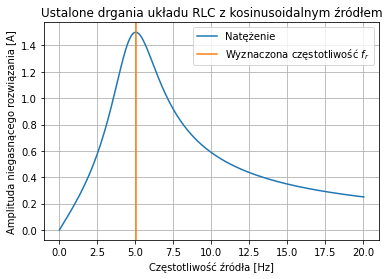

In [9]:
R1, L1, C1, U01 = 20, 1, 0.001, 30
resonance_plot(R1, L1, C1, U01, "Ustalone drgania układu RLC z kosinusoidalnym źródłem")

<center> Wykres 1.

Można patrzeć na ten wykres jako na opis drgań już po upływie pewnego czasu - kiedy rozwiązania układu jednorodnego wygasną.

Gdy spróbujemy manipulować danymi, kształty wykresu ulegną zmianie, ale zawsze wyznaczony punkt będzie punktem rezonansu.

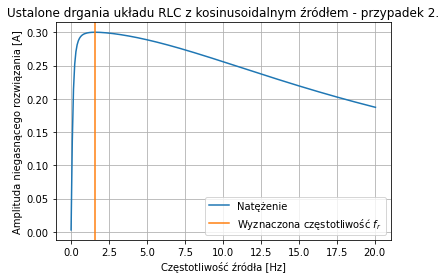

In [10]:
R2, L2, C2, U02 = 100, 1, 0.01, 30
resonance_plot(
    R2,
    L2,
    C2,
    U02,
    "Ustalone drgania układu RLC z kosinusoidalnym źródłem - przypadek 2.",
)

<center> Wykres 2.

# Metody numeryczne
[[5]](#bib5)

Metody numeryczne rozwiązują problemy korzystając z operacji na liczbach. Wyniki są zazwyczaj przybliżone, lecz może je określić sami, ze względu na nasze potrzeby.

In [11]:
def preparation(R, L, C, U0, omega, phase):
    def form(t, i, i_prim):
        return -(U0 * omega * np.sin(omega * t + phase) + R * i_prim + i / C) / L

    return form

# Metoda Eulera 
[[6]](#bib6)

Metoda Eulera pomaga rozwiązywać równania różniczkowe. Opiera się na interpretacji geometrycznej równania.
Została ona ujawniona w 1768 roku w podręczniku Leonharda Eulera pt. Institutiones calculi differentialis, czyli „Kształcenie w rachunku różniczkowym”.

Zastępujemy pochodną różnicą skończoną

Dla $h>0$ mamy:

$$t_n = h n$$

Wykorzystując sieczną przybliżamy styczną

$$y'(t_n) \approx \delta_+ y(t_n) = \frac{y(t_n+h)-y(t_n)}{h}$$

Stąd uzyskujemy również

$$t_n+h = nh + h = \left(n+1\right)h = t_{n+1}$$

Otrzymujemy

$$y'(t_n)\approx \frac{y(t_{n})-y(t_{n-1})}{h}$$

Dość często przydatna może okazać się metoda Eulera w przód (ang. forward Euler method- explicit)

$$f(t_{n-1}, y(t_{n-1}))\approx \frac{y(t_n) - y(t_{n-1})}{h}$$

Podstawiając  $yn$  jako numeryczne przybliżenie  $y(tn)$  otrzymujemy

$$y_n = y_{n-1} + h f(t_{n-1}, y_{n-1})$$

W naszym algorytmie rozszerzamy metodę do równań drugiego rzędu.

Analogicznie do powyższej metody różniczkowania, funkcja oblicza też kolejne całki.

In [12]:
def euler_second(t0, tn, dt, init_condit, form):
    grid_t = np.arange(t0, tn, dt)
    grid_i = grid_t.copy()
    grid_i.fill(0)
    grid_i_prim = grid_t.copy()
    grid_i_prim.fill(0)
    grid_q = grid_t.copy()
    grid_q.fill(0)

    grid_i[0] = init_condit[0]
    grid_i_prim[0] = init_condit[1]
    grid_q[0] = init_condit[2]

    for ind, t in enumerate(grid_t[1:]):
        ind += 1
        prev_i = grid_i[ind - 1]
        prev_i_prim = grid_i_prim[ind - 1]
        grid_i_prim[ind] = prev_i_prim + dt * form(t, prev_i, prev_i_prim)
        grid_i[ind] = prev_i + dt * prev_i_prim
        grid_q[ind] = grid_q[ind - 1] + dt * grid_i[ind]

    return grid_t, grid_i, grid_i_prim, grid_q

# Metoda MidPoint
[[7]](#bib7)

Metoda Midpoint zostałą opracowana na podstwie metody Eulera, 
aczkolwiek zastosowano w niej rozwinęcie w szereg Taylora z dokładnością o jeden krok wiecej niż w metodzie Eulera.
W metodzie tej nachylenie jest szacowane na podstawie wartości 'y' w środku przedziału.

Postępujemy na początku tak samo jak w metodzie Eulera

Aczkolwiek nasz forma przybierze troszkę inną postać

$$f(t_{n-1}+\frac{h}{2}, y_{n-1}+\frac{h}{2}f(t_{n-1},y_{n-1}))\approx \frac{y(t_n) - y(t_{n-1})}{h}$$

Tutaj również rozszerzamu naszą metodę do równań drugiego rzędu.

Analogicznie do powyższej metody różniczkowania, funkcja oblicza też kolejne całki.

In [13]:
def midpoint_second(t0, tn, dt, init_condit, form):
    grid_t = np.arange(t0, tn, dt)
    grid_i = grid_t.copy()
    grid_i.fill(0)
    grid_i_prim = grid_t.copy()
    grid_i_prim.fill(0)
    grid_q = grid_t.copy()
    grid_q.fill(0)

    grid_i[0] = init_condit[0]
    grid_i_prim[0] = init_condit[1]
    grid_q[0] = init_condit[2]

    for ind, t in enumerate(grid_t[1:]):
        ind += 1
        prev_i = grid_i[ind - 1]
        prev_i_prim = grid_i_prim[ind - 1]
        prev_q = grid_q[ind - 1]

        grid_i_prim[ind] = prev_i_prim + dt * form(
            t + dt / 2,
            prev_i + dt * prev_i_prim / 2,
            prev_i_prim + dt * form(t, prev_i, prev_i_prim) / 2,
        )

        grid_i[ind] = prev_i + dt * (prev_i_prim + grid_i_prim[ind]) / 2
        grid_q[ind] = prev_q + dt * (prev_i + grid_i[ind]) / 2

    return grid_t, grid_i, grid_i_prim, grid_q

In [14]:
R = 200
L = 10
C = 0.0001
U0 = 400
omega = 40
phase = 1/2

In [20]:
dobra_metoda = midpoint_second(
    0, 2, 0.001, (0, 0, 0), preparation(10, 1, 0.0001, 30, 40, -np.pi / 2)
)

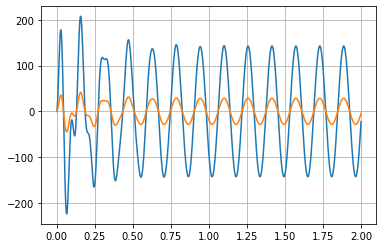

In [28]:
plt.plot(dobra_metoda[0], 1000*dobra_metoda[1])
plt.plot(dobra_metoda[0], R*dobra_metoda[1])
plt.grid()
plt.show()

Wykres przedstawia spadek napięcia na oporniku. Jak widzimy, nie ma tutaj przesunięcia w fazie pomiędzy natężeniem, a napięciem.

Mnożymy tabelę natężeń przez 1000 dla lepszej widoczności wykresu.

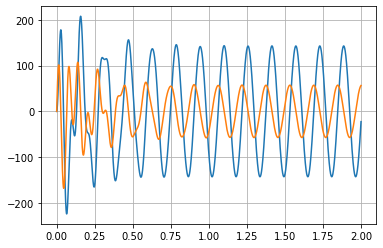

In [27]:
plt.plot(dobra_metoda[0], 1000*dobra_metoda[1])
plt.plot(dobra_metoda[0], L*dobra_metoda[2])
plt.grid()
plt.show()

In [ ]:
Wykres przedstawia spadek napięcia na cewce. Natomiast tutaj widzimy to przesunięcie w fazie, ponieważ we wzorze używamy pochodnej natężenia.

Mnożymy tabelę natężeń przez 1000 dla lepszej widoczności wykresu.

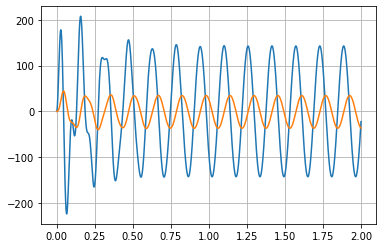

In [29]:
plt.plot(dobra_metoda[0], 1000*dobra_metoda[1])
plt.plot(dobra_metoda[0], dobra_metoda[3]/C)
plt.grid()
plt.show()

Wykres przedstawia spadek napięcia na kondesatorze. Tutaj również mamy przesunięcie w fazie, ponieważ we wzorze używamy całki natężenia.

Mnożymy tabelę natężeń przez 1000 dla lepszej widoczności wykresu.

# PRÓBY

In [20]:
adam = euler_second(
    0, 1, 0.001, (0, 0, 0), preparation(10, 1, 0.0001, 30, 40, -np.pi / 2)
)
ewa = midpoint_second(
    0, 1, 0.001, (0, 0, 0), preparation(10, 1, 0.0001, 30, 40, -np.pi / 2)
)
mateo = euler_second(
    0, 1, 0.0001, (0, 0, 0), preparation(10, 1, 0.000015, 5, 2 * np.pi * 40, -np.pi / 2)
)

<IPython.core.display.Javascript object>

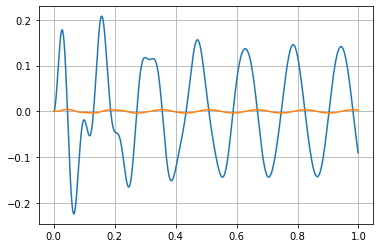

<IPython.core.display.Javascript object>

In [33]:
# plt.plot(*adam)

plt.plot(ewa[0], ewa[1])
# plt.plot(ewa[0], ewa[2])
plt.plot(ewa[0], ewa[3])

plt.grid()
plt.show()

In [10]:
def cum_diff(arr1, arr2):
    diffs = arr1 - arr2[::10]
    abs_diffs = np.abs(diffs)
    return np.cumsum(abs_diffs)

In [ ]:
plt.plot(adam[0], cum_diff(adam[1], mateo[1]))
plt.plot(adam[0], cum_diff(ewa[1], mateo[1]))

# Bibliografia

<a id="bib1">[1]</a> M. Gewert; Z. Skoczylas, *Równania różniczkowe liniowe drugiego rzędu*, [w:] *Równania różniczkowe zwyczajne*, Wrocław 2016, s. 92-94.

<a id="bib2">[2]</a> Ł. Płociniczak, *Ordinary differential equations in science and technology*, 2020, s. 50-57; 62.

<a id="bib3">[3]</a> Tamże, s. 63.

<a id="bib4">[4]</a> M. Szulim, *Rezonans w obwodach elektrycznych*, *Wykład: Obwody i sygnały 1*. [dostęp: 01.01.2022]. Dostęp w Internecie: https://zoise.wel.wat.edu.pl/dydaktyka/WEL%20niestacjonarne/Wyklady/07_Rezonans_obwod_elektryczny.pdf.

...71-73; 85-105.

<a id="bib5">[5]</a> https://pl.wikipedia.org/wiki/Metoda_numeryczna

<a id="bib6">[6]</a> https://pl.wikipedia.org/wiki/Metoda_Eulera 

John C. Butcher, Numerical Methods for Ordinary Differential Equations, New York: John Wiley & Sons, 2003

<a id="bib7">[7]</a> http://www.if.pw.edu.pl/~agatka/numeryczne/wyklad_08.pdf; https://edu.pjwstk.edu.pl/wyklady/fiz/scb/Wyklad2/w2.xml

Süli & Mayers 2003, p. 328

Schematy układów zostały wygenerowane z pomocą strony Circuit Diagram. [dostęp: 01.01.2022]. Dostęp w Internecie: https://www.circuit-diagram.org/editor/.